<a href="https://colab.research.google.com/github/zapata-git/Modelos_Actividad-final/blob/main/Actividad_punto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/usuarios-twitter.csv', sep=',')

In [ ]:
X = df[['op', 'co', 'ex']]
y = df['categoria']

In [ ]:
# Lista para guardar las inercias para cada número de clusters
inercias = []

# Rango de número de clusters que queremos probar
rango = range(1, 11)

# Calculamos la inercia para cada número de clusters
for n in rango:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

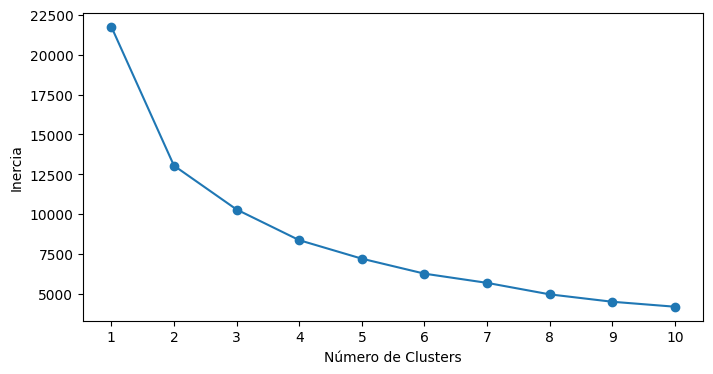

In [ ]:
# Graficamos el metodo del codo
plt.figure(figsize=(8, 4))
plt.plot(rango, inercias, marker='o')
plt.title('')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(rango)
plt.show()

Vemos que el codo se forma en 2 Cluster, por lo tanto seleccionamos este como el número adecuado de Clusters de acuerdo a las caracteristicas que elegimos



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


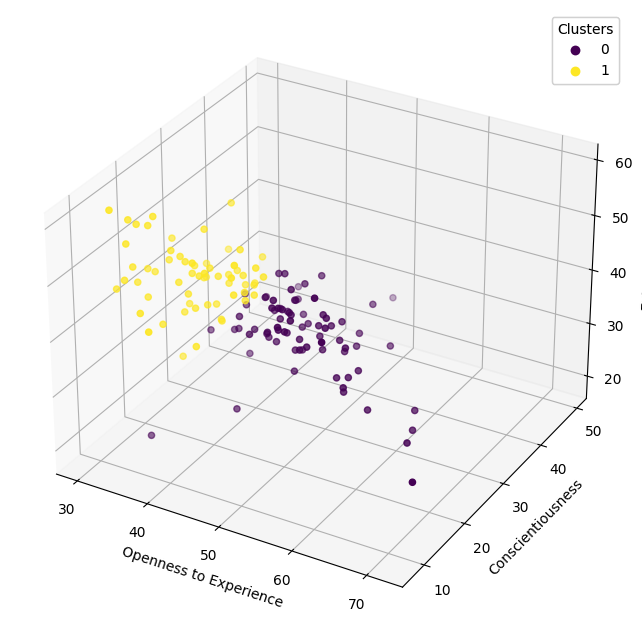

In [ ]:
#entrenamos nuevamente con el n elegido
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Asignamos las etiquetas de los clusters al DataFrame
df['cluster'] = kmeans.labels_

# Creamos una gráfica 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los puntos con colores para cada cluster
scatter = ax.scatter(df['op'], df['co'], df['ex'], c=df['cluster'], cmap='viridis', label=df['cluster'])

# Creamos una leyenda para los clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Etiquetas de los ejes
ax.set_xlabel('Openness to Experience')
ax.set_ylabel('Conscientiousness')
ax.set_zlabel('Extraversion')

# Mostramos la gráfica
plt.show()

nuestro modelo separa dos grupos por rasgos de personalidad, donde en amarillo se observan las personas que tienen Openness to Experience Alta y tanto Conscientiousness y Extraversion Varian, mientras que en el grupo de los morados tenemos que la Extraversion se mantiene baja y tanto Openness to Experience como Conscientiousness varian.
